In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fredapi import Fred
import datetime

fred = Fred(api_key='217049349a6f35360f016d566cbd06f2')
Active_Listing_Count = fred.get_series('ACTLISCOUUS')
df = pd.DataFrame(Active_Listing_Count)
df.reset_index(inplace=True)

new_column_names = {
    'index': 'date',
    0: 'Active Listing Count'
}

df.rename(columns=new_column_names, inplace=True)

df['date'] = pd.to_datetime(df['date'])

df = df.loc[df['date'] >= datetime.datetime(2018, 9, 1)]

df

,date,Active Listing Count
26,2018-09-01,1301421.0
27,2018-10-01,1304194.0
28,2018-11-01,1272566.0
29,2018-12-01,1185402.0
30,2019-01-01,1110220.0
...,...,...
82,2023-05-01,582032.0
83,2023-06-01,613791.0
84,2023-07-01,646698.0
85,2023-08-01,669173.0


In [2]:
import finnhub
import pandas as pd
import datetime

finnhub_client = finnhub.Client(api_key="cl03ruhr01qhjei32o6gcl03ruhr01qhjei32o70")
beginD = int(datetime.datetime(2018,8,1,0,0).timestamp())
endD   = int(datetime.datetime(2023,9,1,0,0).timestamp())

def getReturns(tics):
    stocks = pd.DataFrame()
    for tic in tics:
        dataType = 'candle' 
        resolution = 'M'

        data_t = finnhub_client.stock_candles(tic, resolution, beginD, endD) 
        stock = pd.DataFrame.from_dict(data_t)

        stock['t'] = pd.to_datetime(stock['t'], unit = 's')
        stock.rename(columns={'t': 'date'}, inplace = True)
        stock.rename(columns={'c': tic}, inplace = True)
        stock = stock[['date', tic]]
        if stocks.empty:
            stocks = stock
        else:
            stocks = pd.merge(stocks, stock, how = 'inner', on = ['date'])
    return stocks

def getSO(tics):
    stocks = pd.DataFrame()
    for tic in tics:
        dataType = 'candle' 
        resolution = 'M'

        data_t = finnhub_client.stock_candles(tic, resolution, beginD, endD) 
        stock = pd.DataFrame.from_dict(data_t)

        stock['t'] = pd.to_datetime(stock['t'], unit = 's')
        stock.rename(columns={'t': 'date'}, inplace = True)
        stock.rename(columns={'c': tic}, inplace = True)
        stock = stock[['date', tic]]
        if stocks.empty:
            stocks = stock
        else:
            stocks = pd.merge(stocks, stock, how = 'inner', on = ['date'])
    return stocks


BuildingETFs = getReturns(['BZH','MHO','PHM','GRBK','HOV','TOL','PATK','KBH','MTH','LSEA','TPH','TMHC','CCS','DHI','FTDR'])

In [7]:
data = df.merge(BuildingETFs, how='inner', left_on='date', right_on='date')
data

,date,Active Listing Count,BZH,MHO,PHM,GRBK,HOV,TOL,PATK,KBH,MTH,LSEA,TPH,TMHC,CCS,DHI,FTDR
0,2018-09-01,1301421.0,10.50,23.93,24.77,10.10,40.0000,33.03,59.20,23.91,39.90,9.6000,12.40,18.04,26.25,42.18,41.000
1,2018-10-01,1304194.0,8.81,24.17,24.57,9.40,36.5000,33.66,43.51,19.97,37.25,9.6100,11.90,16.54,21.22,35.96,34.050
2,2018-11-01,1272566.0,11.26,23.54,26.52,8.30,31.7500,32.97,39.72,21.11,38.25,9.7499,12.48,16.91,20.57,37.22,23.290
3,2018-12-01,1185402.0,9.48,21.02,25.99,7.24,17.0975,32.93,29.61,19.10,36.72,9.7800,10.93,15.90,17.26,34.66,26.610
4,2019-01-01,1110220.0,12.53,26.49,27.81,8.46,17.6525,36.94,39.90,21.41,45.08,9.9600,13.45,18.90,23.46,38.45,29.720
5,2019-02-01,1102257.0,12.12,26.04,27.00,8.91,16.9275,35.60,45.21,22.81,43.85,9.9700,12.60,16.77,22.83,38.89,32.000
6,2019-03-01,1115464.0,11.51,26.62,27.96,8.75,10.9700,36.20,45.32,24.17,44.71,10.0500,12.64,17.75,23.97,41.38,34.420
7,2019-04-01,1136639.0,13.29,28.17,31.46,8.94,15.2200,38.10,49.87,25.91,51.15,10.0800,13.05,19.36,25.43,44.31,35.240
8,2019-05-01,1180347.0,9.08,27.38,31.00,8.69,9.5000,34.77,40.79,25.13,50.10,10.1000,12.30,19.97,26.70,42.76,40.210
9,2019-06-01,1219250.0,9.61,28.54,31.62,8.31,7.6000,36.62,49.19,25.73,51.34,10.1800,11.97,20.96,26.58,43.13,43.550


In [3]:
import numpy as np
import statsmodels.api as sm

In [8]:
import statsmodels.api as sm

independent_variables = ['BZH', 'MHO', 'PHM', 'GRBK', 'HOV', 'TOL', 'PATK', 'KBH', 'MTH', 'LSEA', 'TPH', 'TMHC', 'CCS', 'DHI', 'FTDR']

p_values = []

alpha = 0.05

def colorize(text, color):
    colors = {
        'green': '\033[92m',
        'red': '\033[91m',
        'reset': '\033[0m'
    }
    return f"{colors[color]}{text}{colors['reset']}"

for var_name in independent_variables:
    model = sm.OLS(data['Active Listing Count'], data[var_name], missing='drop')
    results = model.fit()
    
    p_value = results.pvalues[0]
    
    p_values.append((var_name, p_value))

for var_name, p_value in p_values:
    colored_text = colorize("Correlated", 'green') if p_value < alpha else colorize("Not Correlated", 'red')
    print(f'Stock: {var_name} - P-value for coefficient: {p_value:.30f} - {colored_text}')

Stock: BZH - P-value for coefficient: 0.000000000000000443947378354661 - Correlated
Stock: MHO - P-value for coefficient: 0.000000000000013932890102600354 - Correlated
Stock: PHM - P-value for coefficient: 0.000000000000000180336328301114 - Correlated
Stock: GRBK - P-value for coefficient: 0.000000000222722479697201144908 - Correlated
Stock: HOV - P-value for coefficient: 0.000000128435096317555301337338 - Correlated
Stock: TOL - P-value for coefficient: 0.000000000000000052707225264783 - Correlated
Stock: PATK - P-value for coefficient: 0.000000000000000018163055578944 - Correlated
Stock: KBH - P-value for coefficient: 0.000000000000000002509386361581 - Correlated
Stock: MTH - P-value for coefficient: 0.000000000000003311372688961452 - Correlated
Stock: LSEA - P-value for coefficient: 0.000000000000000000000000000000 - Correlated
Stock: TPH - P-value for coefficient: 0.000000000000000310266322621736 - Correlated
Stock: TMHC - P-value for coefficient: 0.000000000000000034165135450375 -

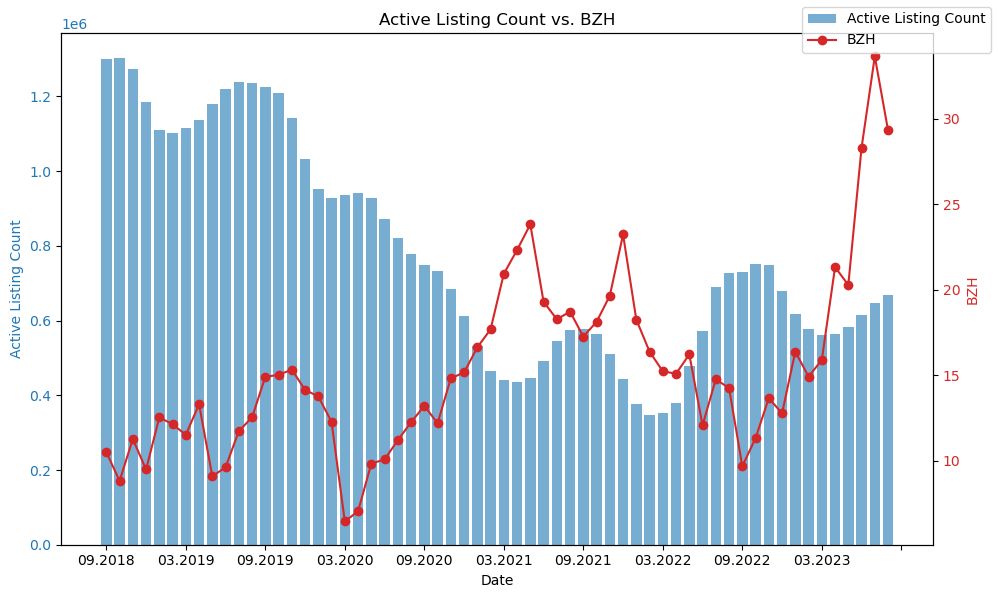

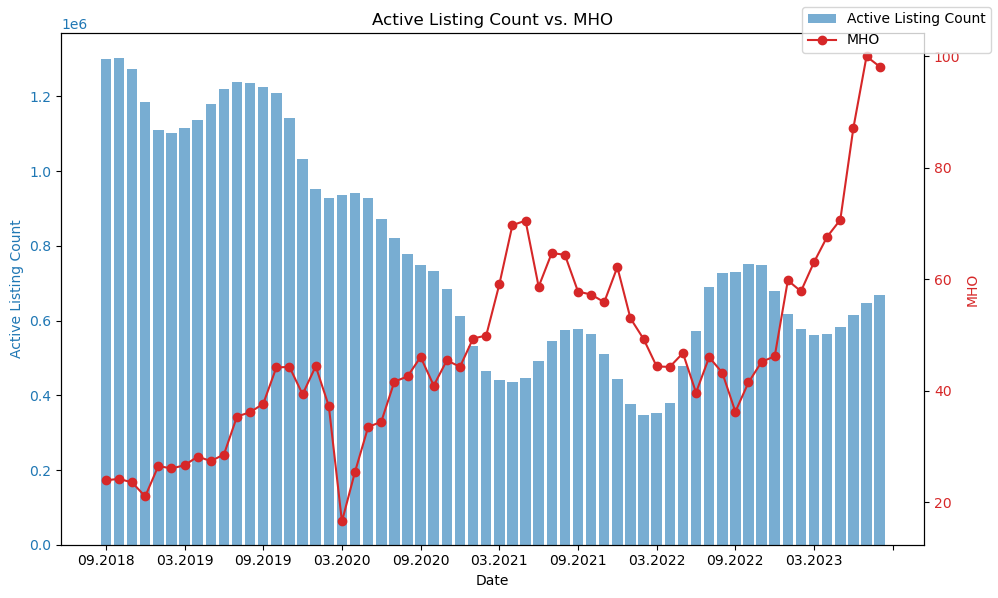

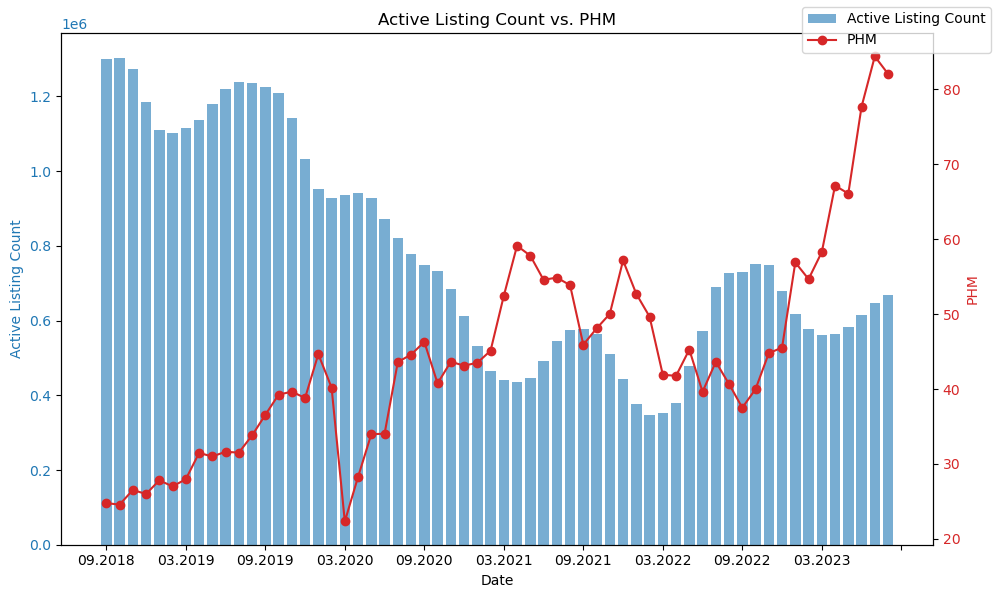

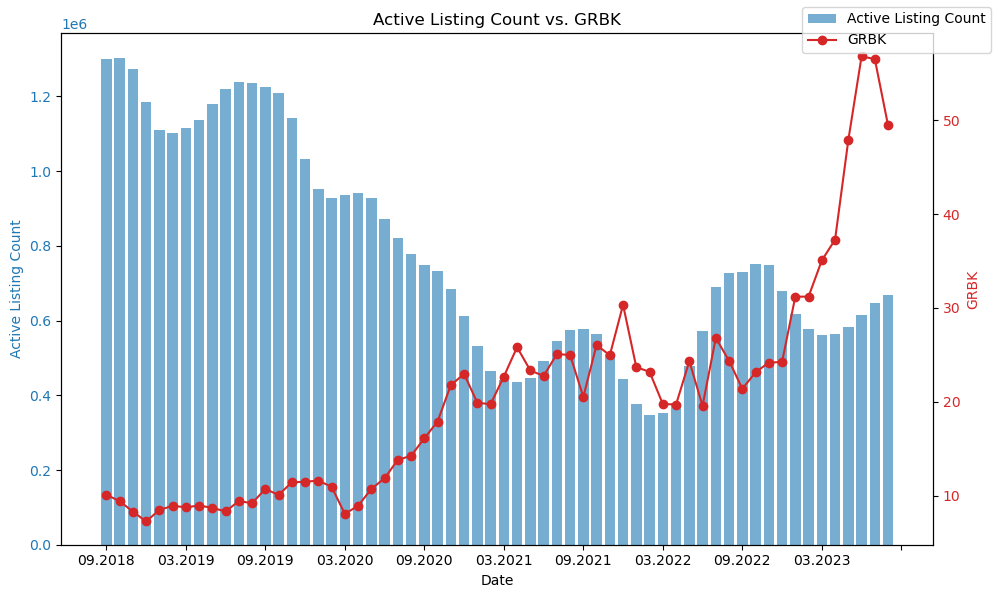

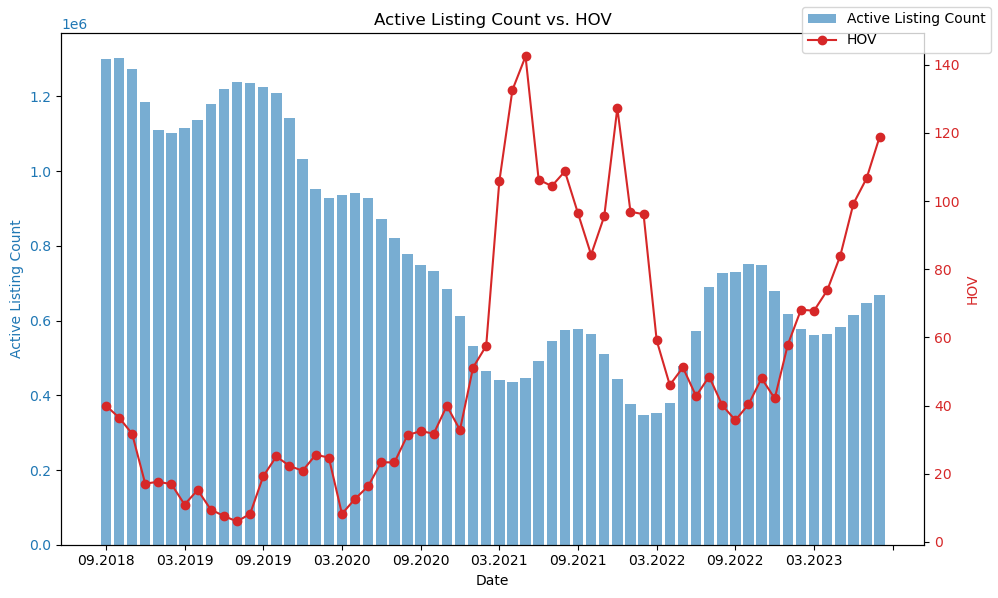

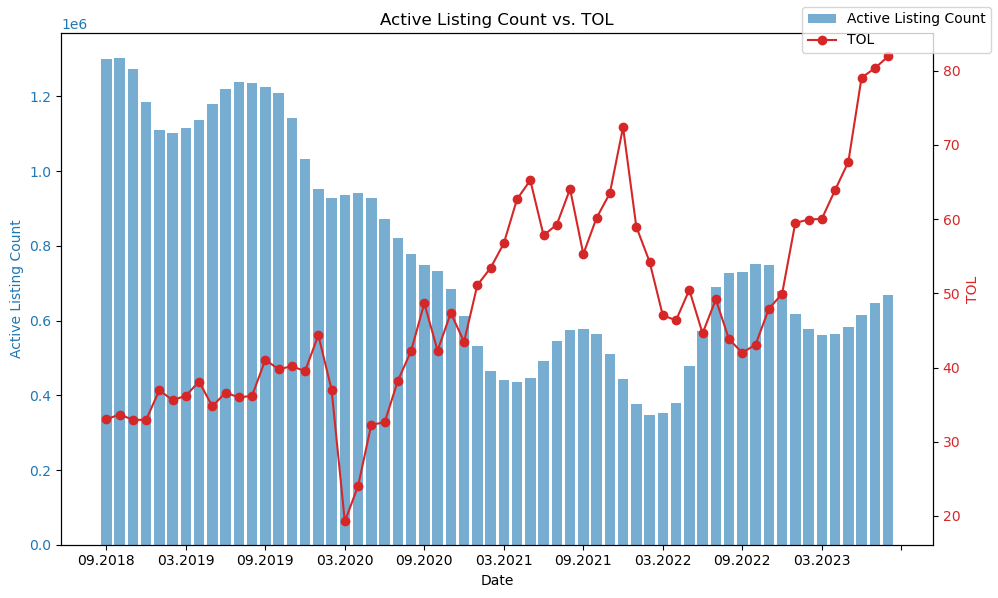

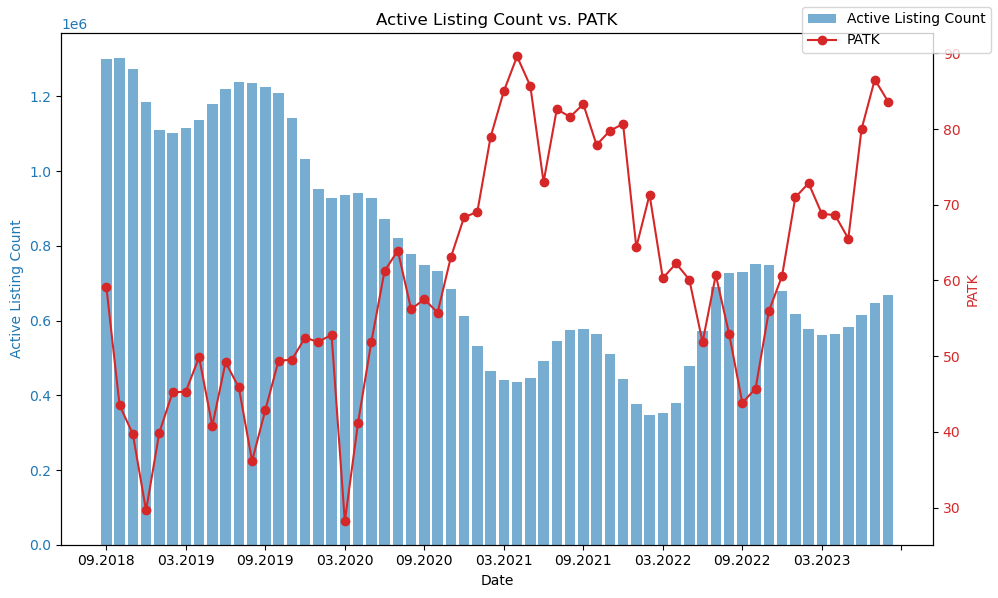

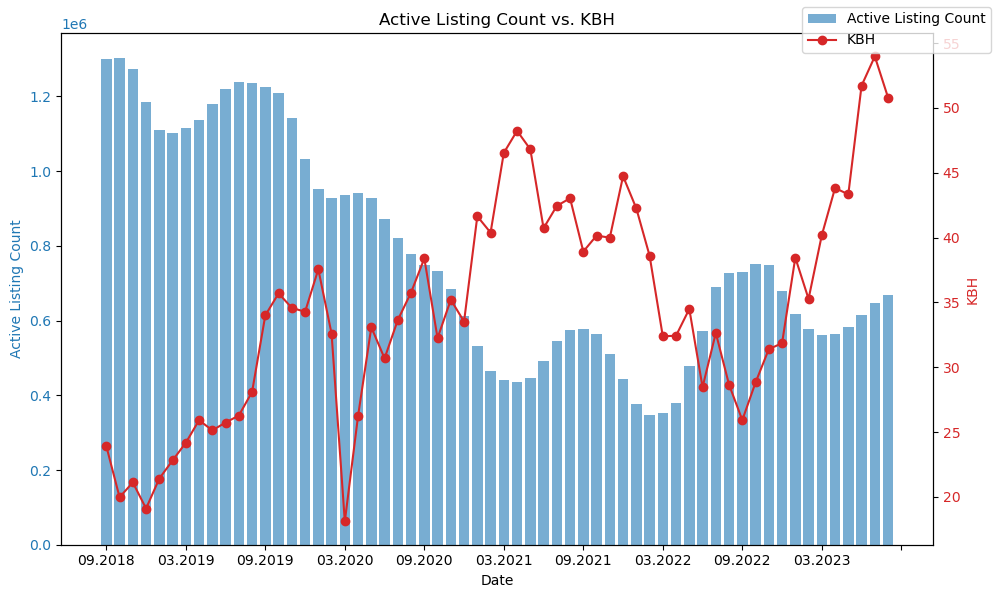

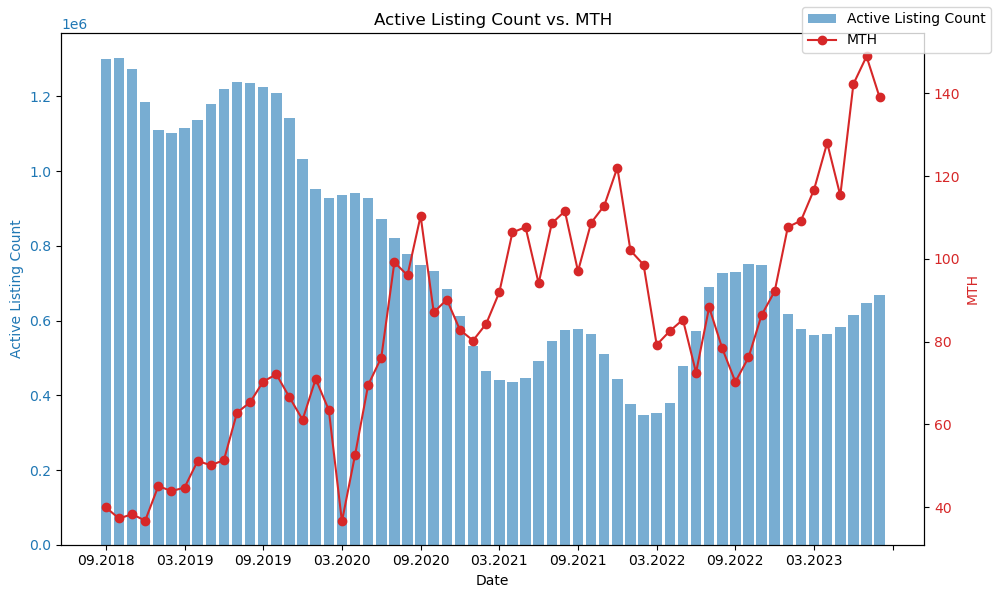

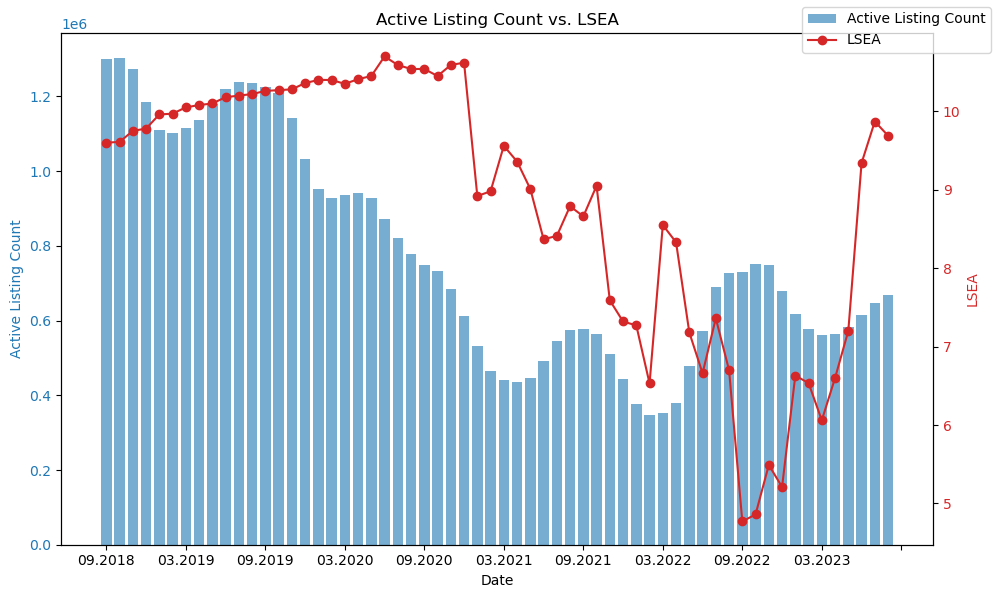

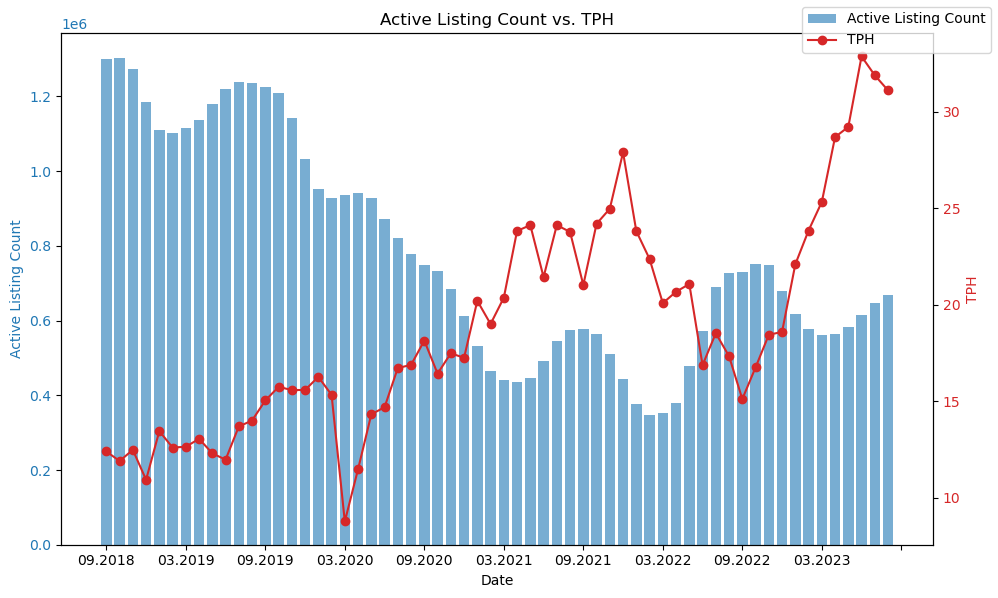

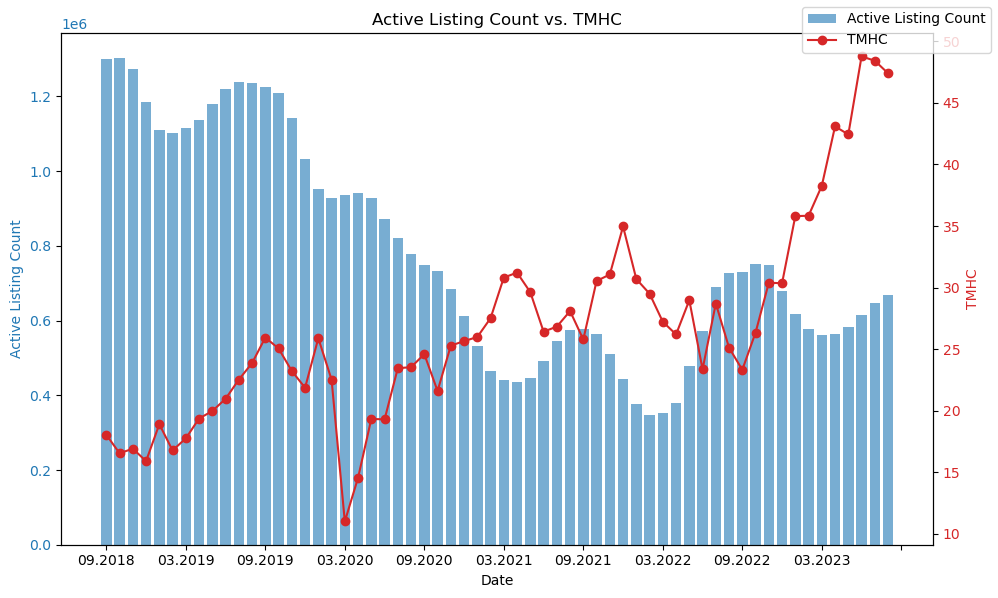

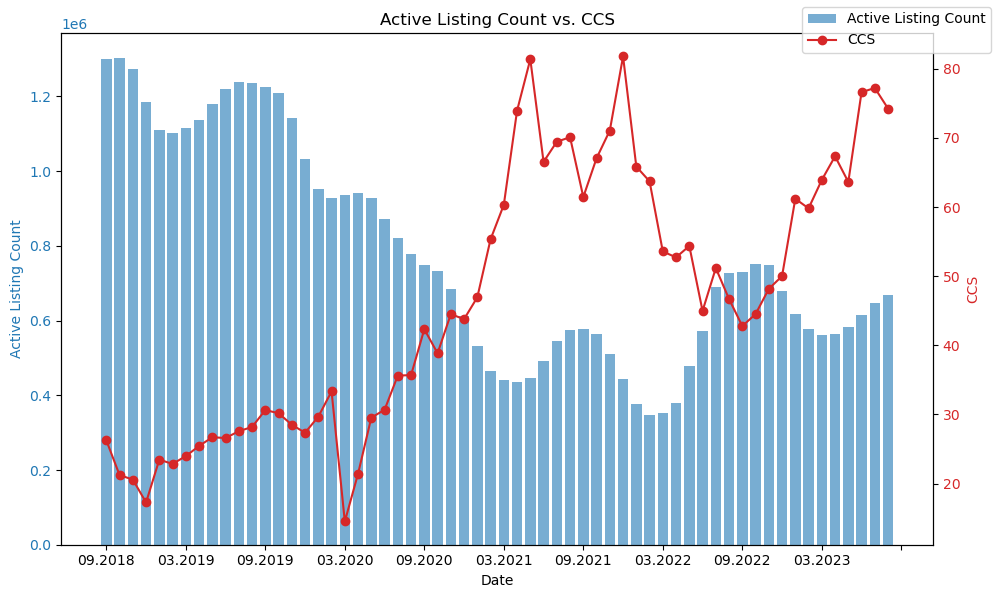

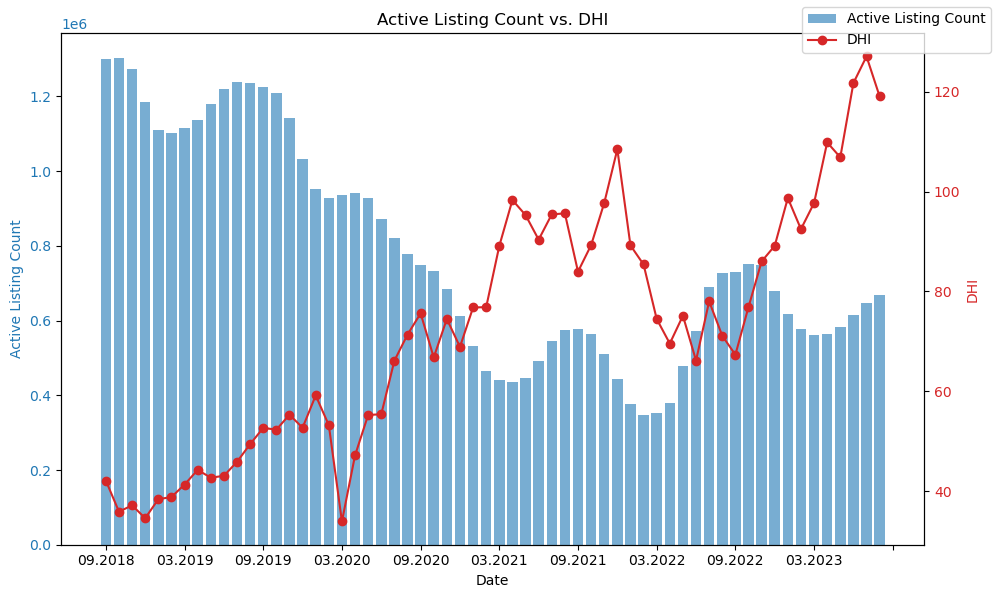

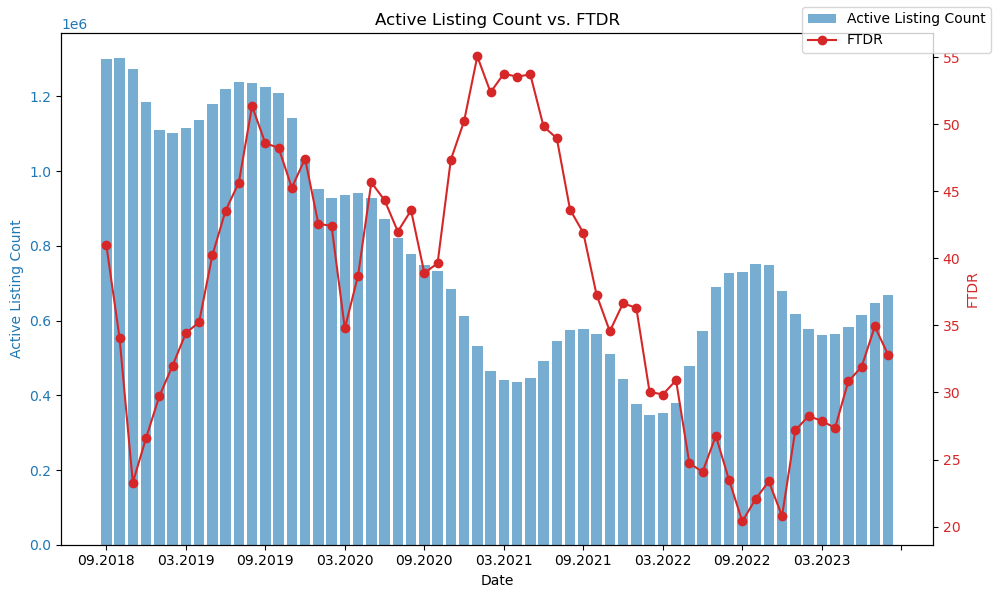

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

independent_variables = ['BZH', 'MHO', 'PHM', 'GRBK', 'HOV', 'TOL', 'PATK', 'KBH', 'MTH', 'LSEA', 'TPH', 'TMHC', 'CCS', 'DHI', 'FTDR']

x = np.arange(len(data))

for var_name in independent_variables:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Active Listing Count', color=color)
    ax1.bar(x, data['Active Listing Count'], color=color, alpha=0.6, label='Active Listing Count', width=0.8)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(var_name, color=color)
    ax2.plot(x, data[var_name], color=color, marker='o', label=var_name)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()

    fig.legend(loc='upper right')

    plt.title(f'Active Listing Count vs. {var_name}')
    
    date_labels = [date.strftime('%m.%Y') for date in pd.to_datetime(data['date'])]
    plt.xticks(x, date_labels, rotation=90, ha='right', va='top')
    locator = ticker.MultipleLocator(base=6)
    ax1.xaxis.set_major_locator(locator)

    plt.savefig(f'plot_{var_name}.png')
    plt.show() 

    plt.close()